In [33]:
import tensorflow as tf
import cv2
import time
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras import Model
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import optimizers
import os

In [34]:
#顯示執行GPU
!nvidia-smi

Sun Nov  7 14:10:31 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    71W / 149W |   4093MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [35]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
os.chdir("/content/drive/Shareddrives/paper/NM6104038_NM6101098_GAN_Group5") #change to this path
print(os.getcwd())

Mounted at /content/drive/
/content/drive/Shareddrives/paper/NM6104038_NM6101098_GAN_Group5


In [36]:
class Discriminative(Model):
  def __init__(self):
    super(Discriminative, self).__init__()
    self.conv1 = Conv2D(256, 4,padding='same')
    self.leakyrelu1 = LeakyReLU()
    self.conv2 = Conv2D(256, 4,padding='same')
    self.leakyrelu2 = LeakyReLU()
    self.conv3 = Conv2D(256, 4,padding='same')
    self.leakyrelu3 = LeakyReLU()
    self.conv4 = Conv2D(512, 4,padding='same')
    self.leakyrelu4 = LeakyReLU()
    self.conv5 = Conv2D(1, 4,padding='same')
    self.leakyrelu5 = LeakyReLU()
    self.conv6 = Conv2D(1, 6,padding='same', activation='sigmoid')
  def call(self, x):
    x = self.conv1(x)
    x = self.leakyrelu1(x)
    x = self.conv2(x)
    x = self.leakyrelu2(x)
    x = self.conv3(x)
    x = self.leakyrelu3(x)
    x = self.conv4(x)
    x = self.leakyrelu4(x)
    x = self.conv5(x)
    x = self.leakyrelu5(x)
    return self.conv6(x)

In [37]:
class Generative(Model):
  def __init__(self):
    super(Generative, self).__init__()
    self.conv1 = Conv2D(172, 7,padding='same')
    self.leakyrelu1 = LeakyReLU()
    self.conv2 = Conv2D(256, 4,padding='same')
    self.leakyrelu2 = LeakyReLU()
    self.conv3 = Conv2D(512, 4,padding='same')
    self.leakyrelu3 = LeakyReLU()
    self.dilatedconv1 = Conv2D(512, 3,(1,1),'same',None,(2,2))
    self.leakyrelu4 = LeakyReLU()
    self.dilatedconv2 = Conv2D(512, 3,(1,1),'same',None,(2,2))
    self.leakyrelu5 = LeakyReLU()

    self.dilatedconv3 = Conv2D(512, 3,(1,1),'same',None,(2,2))
    self.leakyrelu6 = LeakyReLU()
    self.dilatedconv4 = Conv2D(512, 3,(1,1),'same',None,(2,2))
    self.leakyrelu7  = LeakyReLU()

    self.transconv1 = Conv2DTranspose(256, 4,padding='same')
    self.leakyrelu8  = LeakyReLU()
    self.transconv2 = Conv2DTranspose(256, 4,padding='same')
    self.leakyrelu9  = LeakyReLU()

    self.conv4 = Conv2D(3, 7,padding='same')
    self.leakyrelu10 = LeakyReLU()
  def call(self, x):
      x1 = self.conv1(x)
      x2 = self.leakyrelu1(x1)
      x3 = self.conv2(x2)
      x4 = self.leakyrelu2(x3)
      x5 = self.conv3(x4)
      x6 = self.leakyrelu3(x5)
      x7 = self.dilatedconv1(x6)
      x8 = self.leakyrelu4(x7)
      x9 = self.dilatedconv2(x8)
      x10 = tf.add(x6,x9)
      x11 = self.leakyrelu5(x10)
      x12 = self.dilatedconv3(x11)
      x13 = self.leakyrelu6(x12)
      x14 = self.dilatedconv4(x13)
      x15 = tf.add(x11,x14)
      x16 = self.leakyrelu7(x15)
      x17 = self.transconv1(x16)
      x18 = self.leakyrelu8(x17)
      x19 = self.transconv2(x18)
      x20 = self.leakyrelu8(x19)
      x21 = self.conv4(x20)
      return self.leakyrelu8(x21)


In [38]:
## 實際使用

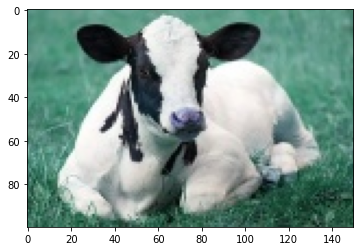

In [39]:
img = cv2.imread("./cow1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
input_shape = img.shape




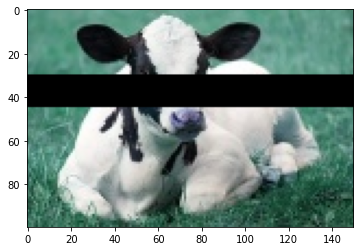

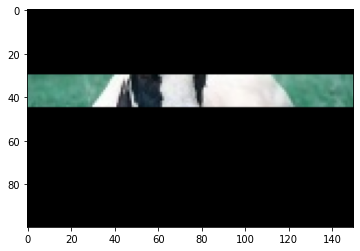

In [40]:
mask = np.ones(input_shape,dtype="int32")
mask[:][30:45][:] = 0
inv_mask = np.zeros(input_shape,dtype="int32")
inv_mask[:][30:45][:] = 1


maskimg = img * mask
inv_mask_img = img * inv_mask
plt.imshow(maskimg)
plt.show()
plt.imshow(inv_mask_img)
plt.show()

cv2.imwrite('1.jpg',img)
cv2.imwrite('2.jpg',maskimg)
cv2.imwrite('3.jpg',inv_mask_img)
mask_img = preprocess_input(maskimg)

In [41]:
#建構並顯示Generative架構
generator = Generative()
img_in = []
image = preprocess_input(img)
img_in.append(image)
img_in = np.array(img_in)
generator.build(img_in.shape)
generator.summary()

Model: "generative_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           multiple                  25456     
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   multiple                  0         
_________________________________________________________________
conv2d_21 (Conv2D)           multiple                  704768    
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   multiple                  0         
_________________________________________________________________
conv2d_22 (Conv2D)           multiple                  2097664   
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   multiple                  0         
_________________________________________________________________
conv2d_23 (Conv2D)           multiple                 

In [42]:
input = []
input.append(mask_img)
input = np.array(input)
#建構並顯示Discriminative
discriminator = Discriminative()
discriminator_mask = Discriminative()
discriminator.build(img_in.shape)
discriminator.summary()

generator_optimizer = optimizers.Adam(0.000001)
discriminator_optimizer = optimizers.Adam(0.000001)
discriminator_mask_optimizer= optimizers.Adam(0.000001)

Model: "discriminative_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           multiple                  12544     
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   multiple                  0         
_________________________________________________________________
conv2d_29 (Conv2D)           multiple                  1048832   
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   multiple                  0         
_________________________________________________________________
conv2d_30 (Conv2D)           multiple                  1048832   
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   multiple                  0         
_________________________________________________________________
conv2d_31 (Conv2D)           multiple             

In [43]:
def cal_G_loss(img,gy, dgy):
  first_input = tf.norm(tf.subtract(gy,img), ord= 1)
  second_input = tf.math.multiply(0.0001, tf.math.log(tf.subtract(1.0 ,dgy)))
  return tf.add(first_input, second_input)
def cal_D_loss(dimg, dgy):
  first_input = tf.math.log(tf.subtract(1.0, dgy))
  second_input = tf.math.log(dimg)
  return tf.math.multiply(-1.0, tf.add(first_input, second_input))
def train_step(img_in, mask_img_in, inv_in, inv_mask):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_nomask_tape, tf.GradientTape() as disc_mask_tape:

    generated_images = generator(mask_img_in, training=True)
    inv_mask_g_img = tf.multiply(generated_images,inv_mask)
    real_output_nomask = discriminator(img_in, training=True)
    fake_output_nomask= discriminator(generated_images, training=True)

    real_output_invmask = discriminator_mask(inv_in, training=True)
    fake_output_invmask = discriminator_mask(inv_mask_g_img, training=True)
    
    gen_loss_1 = cal_G_loss(generated_images, img_in, fake_output_nomask)
    gen_loss_2 = cal_G_loss(generated_images, img_in, fake_output_invmask)
    gen_loss = tf.add(gen_loss_1, gen_loss_2)
   
    d_loss_nomask = cal_D_loss(real_output_nomask, fake_output_nomask)
    d_loss_invmask = cal_D_loss(real_output_invmask, fake_output_invmask)
  
  # Gnet Gradient compute
  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables) 

  # Dnet Gradient compute
  gradients_of_discriminator_nomask = disc_nomask_tape.gradient(d_loss_nomask, discriminator.trainable_variables)
  gradients_of_discriminator_mask = disc_mask_tape.gradient(d_loss_invmask, discriminator_mask.trainable_variables)

  # Gnet
  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

  # Dnet
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator_nomask, discriminator.trainable_variables))
  discriminator_mask_optimizer.apply_gradients(zip(gradients_of_discriminator_mask, discriminator_mask.trainable_variables))
  return gen_loss, d_loss_nomask, d_loss_invmask


In [ ]:
g_loss_total = []
d_loss_total = []
dloss_mask_total = []
def train(img, epochs):

  img = img.astype(dtype='float32')
  mask = np.ones(input_shape,dtype="float32")
  mask[:][30:45][:] = 0.0
  inv_mask = np.zeros(input_shape,dtype="float32")
  inv_mask[:][30:45][:] = 1.0

  mask_img = img * mask
  inv_mask_img = img * inv_mask

  mask_img_in = []
  mask_img = preprocess_input(mask_img)
  mask_img_in.append(mask_img)
  mask_img_in = np.array(mask_img_in)
  
  img_in = []
  image = preprocess_input(img)
  img_in.append(image)
  img_in = np.array(img_in)

  inv_in = []
  inv_mask_img = preprocess_input(inv_mask_img)
  inv_in.append(inv_mask_img)
  inv_in = np.array(inv_in)
  
 

  for epoch in range(epochs):
    start = time.time()
    print("epoch %d" % epoch)
    gen_loss, disc_loss_nomask, disc_loss_invmask = train_step(img_in, mask_img_in, inv_in, inv_mask)
    g_loss_total.append(tf.math.reduce_mean(gen_loss))
    d_loss_total.append(tf.math.reduce_mean(disc_loss_nomask))
    dloss_mask_total.append(tf.math.reduce_mean(disc_loss_invmask))
    print ('Time for epoch {} is {} sec'.format(epoch , time.time()-start))
    #generate_and_save_images(generator,epoch,mask_img_in)

def generate_and_save_images(model, epoch, test_input):
  predictions = model(test_input, training=False)
  plt.imshow(predictions[0, :, :, 0], cmap='gray')
  plt.title('epoch: {:03d}'.format(epoch))
  plt.axis('off')
  plt.savefig('./image/epoch{:04d}.png'.format(epoch))

train(img,500)



epoch 0
Time for epoch 0 is 0.8690710067749023 sec
epoch 1
Time for epoch 1 is 3.138680934906006 sec
epoch 2
Time for epoch 2 is 3.2376809120178223 sec
epoch 3
Time for epoch 3 is 3.260406494140625 sec
epoch 4
Time for epoch 4 is 3.250270366668701 sec
epoch 5
Time for epoch 5 is 3.2632808685302734 sec
epoch 6
Time for epoch 6 is 3.283569097518921 sec
epoch 7
Time for epoch 7 is 3.279667377471924 sec
epoch 8
Time for epoch 8 is 3.2781827449798584 sec
epoch 9
Time for epoch 9 is 3.27823543548584 sec
epoch 10
Time for epoch 10 is 3.2871973514556885 sec
epoch 11
Time for epoch 11 is 3.26274037361145 sec
epoch 12
Time for epoch 12 is 3.266056776046753 sec
epoch 13
Time for epoch 13 is 3.2707464694976807 sec
epoch 14
Time for epoch 14 is 3.2573084831237793 sec
epoch 15
Time for epoch 15 is 3.2676539421081543 sec
epoch 16
Time for epoch 16 is 3.2443766593933105 sec
epoch 17
Time for epoch 17 is 3.2670509815216064 sec
epoch 18
Time for epoch 18 is 3.2718188762664795 sec
epoch 19
Time for epoch

In [ ]:
plt.plot(dloss_mask_total)
plt.title("dloss_mask_total")
plt.savefig('./image/d_mask_loss.png')

In [ ]:
plt.plot(g_loss_total)
plt.title("g_loss_total")
plt.savefig('./image/g_loss.png')

In [ ]:
plt.plot(d_loss_total)
plt.title("d_loss_total")
plt.savefig('./image/d_loss_total.png')